In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 3.1 Churn Prediction
[Overview of Churn Prediction](https://www.youtube.com/watch?v=0Zw04wdeTQo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=29)

This project focuses on using Binary Classification. The goal is to predict whether a customer will churn (leave the service) or not. 

<div align="center"><b>Binary Classification Formula:</b></div>

$$g(x_i) \approx y_i$$

Where:
- $y_i$ is the true label (0 or 1) for the $i^{th}$ instance
- 0 -> Not Churn
- 1 -> Churn

# 3.2 Data Preparation

In [3]:
# Read the data
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Transpoosing data to see all fields easier
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ','_')

# Standardizing categorical columns to lowercase and replacing spaces with underscores
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
# Force totalcharges to be numeric, setting errors to 'coerce' will turn invalid parsing into NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Replacing NaN values with 0
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df[tc.isna()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [9]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [10]:
# cnvert to a binary variable
df['churn'] = (df['churn'] == 'yes').astype(int)

# 3.3 Validation framework
- Perform the train/validation/test split using Scikit-Learn's `train_test_split` function.

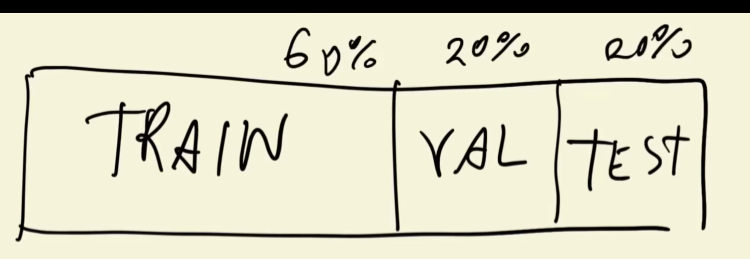

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
#Split full_Train into Train & Validation

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
print(f'df_train size: {len(df_train)}\ndf_val size: {len(df_val)}\ndf_test size: {len(df_test)}')

df_train size: 4225
df_val size: 1409
df_test size: 1409


In [14]:
# reset index
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
# Storing Target Variables
y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']

In [16]:
# remove Target from df
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 Exploratory Data Analysis (EDA)
1. check for missing values
2. look at the target variable *(churn)*
3. look at numerical variables
4. look at categorical variables

In [17]:
#1. Check for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

The are no missing values in the dataset. No need to replace any values.

In [18]:
#2. Look at the Target variable
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

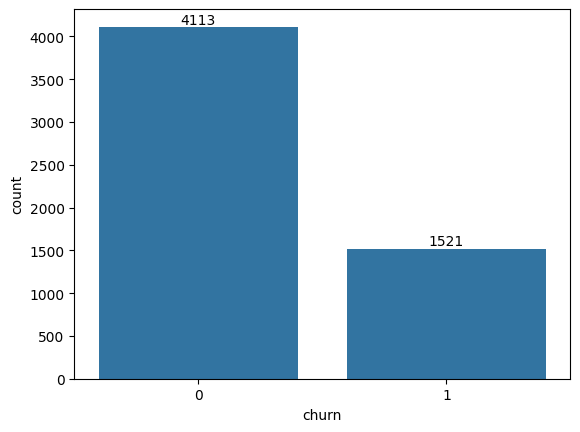

In [19]:
ax = sns.countplot(x='churn', data=df_full_train)
ax.bar_label(ax.containers[0])
plt.show()

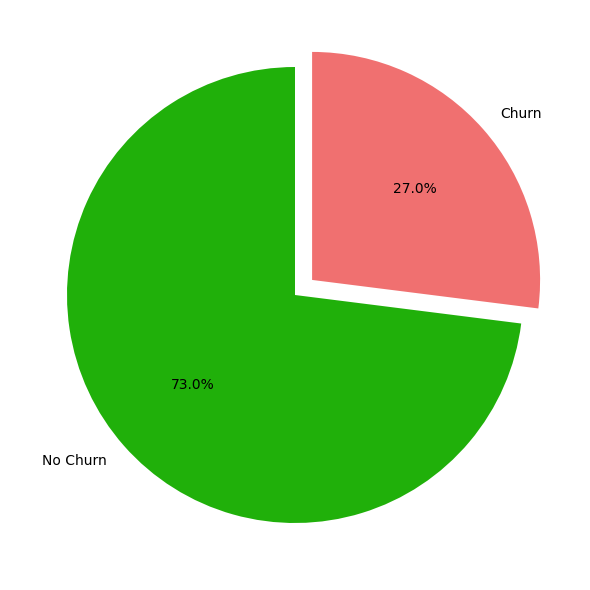

In [20]:
churn_norm = df_full_train['churn'].value_counts(normalize=True).sort_index()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(churn_norm.values, labels=['No Churn', 'Churn'], autopct='%.1f%%', startangle=90, explode =(0, 0.1), colors=["#20B00A","#f07070"])
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [21]:
# list of numeric categories
num_cols  = ['tenure', 'monthlycharges', 'totalcharges']
num_cols 

['tenure', 'monthlycharges', 'totalcharges']

In [22]:
cat_cols = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice',
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
            'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod'
            ]
cat_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [177]:
df_full_train[cat_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn rate & Risk Ratio

Feature importance analysis *(part of EDA)* helps us identify which features affect the target variable the most.

- **Churn Rate**: The proportion of customers who churn within a specific group or category. It is calculated as:
$$Churn Rate = \frac{Number\ of\ Churned\ Customers\ in\ Group}{Total\ Number\ of\ Customers\ in\ Group}$$
- **Risk Ratio (Relative Risk)**: The ratio of the probability of an event occurring in an exposed group to the probability of the event occurring in a non-exposed group. It is calculated as:
$$Risk\ Ratio = \frac{Churn\ Rate\ in\ Exposed\ Group}{Churn\ Rate\ in\ Non-Exposed\ Group}$$

## Churn Rate

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


### Global Churn Rate

In [ ]:
# Universal Churn Rate
global_churn = df_full_train['churn'].mean()
global_churn

#Global Churn Rate:
#26.69%

np.float64(0.26996805111821087)

### Gender Churn Rate

In [28]:
# Churn Rate for Females
churn_female = df_full_train[df_full_train['gender']=='female']['churn'].mean()
churn_female

np.float64(0.27682403433476394)

In [29]:
# Churn Rate for Male
churn_male = df_full_train[df_full_train['gender']=='male']['churn'].mean()
churn_male

np.float64(0.2632135306553911)

### Partner Churn Rate

In [ ]:
# Churn for no Partner
churn_partner_no = df_full_train[df_full_train['partner']== 'no']['churn'].mean()
churn_partner_no

# Churn for no Partner
#32.98%

np.float64(0.3298090040927694)

In [ ]:
# Churn for yes Partner
churn_partner = df_full_train[df_full_train['partner']== 'yes']['churn'].mean()
churn_partner

# Churn for Partner
#20.50%

np.float64(0.20503330866025166)

In [35]:
np.round(global_churn*100 - churn_partner*100, 3)

np.float64(6.493)

In [34]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [206]:
np.round(global_churn*100 - churn_partner_no*100,3)

np.float64(-5.984)

In [222]:
global_churn - churn_partner_no

np.float64(-0.05984095297455855)

**Feature Importance**:

1. Difference between the overall churn rate and the churn rate for each category of a feature.
$$Global - Group$$

If difference > than 0, then the global churn rate is higher than the group churn rate. This means that the group is less likely to churn than the average customer.

If difference < than 0, then the global churn rate is lower than the group churn rate. This means that the group is more likely to churn than the average customer.

If difference = 0, then the global churn rate is equal to the group churn rate. This means that the group has the same likelihood of churning as the average customer.


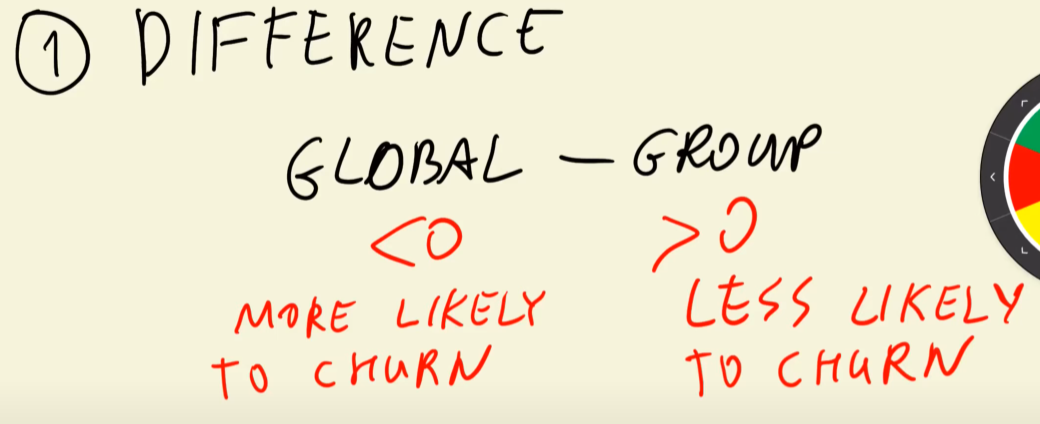

## Risk Ratio

<div align="center"><b>Risk Ratio Formula:</b></div>

$$Risk=\frac{Group}{Global}$$

<br><br>
Where:
- **Group** = Churn Rate for the specific group/category
- **Global** = Churn Rate for all customers
- If Risk > 1, then the group is more likely to churn than the average customer.
- If Risk < 1, then the group is less likely to churn than the average customer

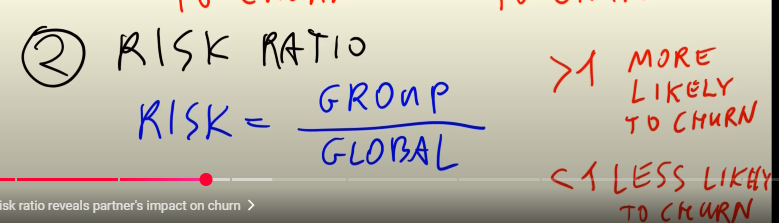

In [223]:
churn_partner_no / global_churn

np.float64(1.2216593879412643)

In [224]:
churn_partner / global_churn

np.float64(0.7594724924338315)

In [39]:
from IPython.display import display

In [59]:
for c in cat_cols:
    print(c.title())
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count']).round(3)
    df_group['diff'] =  global_churn - df_group['mean']
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

Gender


,mean,count,diff,risk
gender,,,,
female,0.277,2796,-0.007032,1.026047
male,0.263,2838,0.006968,0.974189




Seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242,4722,0.027968,0.896402
1,0.413,912,-0.143032,1.529811




Partner


,mean,count,diff,risk
partner,,,,
no,0.330,2932,-0.060032,1.222367
yes,0.205,2702,0.064968,0.759349




Dependents


,mean,count,diff,risk
dependents,,,,
no,0.314,3968,-0.044032,1.163101
yes,0.166,1666,0.103968,0.614888




Phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241,547,0.028968,0.892698
yes,0.273,5087,-0.003032,1.011231




Multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257,2700,0.012968,0.951964
no_phone_service,0.241,547,0.028968,0.892698
yes,0.291,2387,-0.021032,1.077905




Internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192,1934,0.077968,0.711195
fiber_optic,0.425,2479,-0.155032,1.574260
no,0.078,1221,0.191968,0.288923




Onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.421,2801,-0.151032,1.559444
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.153,1612,0.116968,0.566734




Onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404,2498,-0.134032,1.496473
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.217,1915,0.052968,0.803799




Deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.396,2473,-0.126032,1.466840
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.230,1940,0.039968,0.851953




Techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.419,2781,-0.149032,1.552036
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.160,1632,0.109968,0.592663




Streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.343,2246,-0.073032,1.270521
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.303,2167,-0.033032,1.122355




Streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.339,2213,-0.069032,1.255704
no_internet_service,0.078,1221,0.191968,0.288923
yes,0.307,2200,-0.037032,1.137172




Contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.432,3104,-0.162032,1.600189
one_year,0.121,1186,0.148968,0.448201
two_year,0.028,1344,0.241968,0.103716




Paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172,2313,0.097968,0.637112
yes,0.338,3321,-0.068032,1.252000




Paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168,1219,0.101968,0.622296
credit_card_(automatic),0.164,1217,0.105968,0.607479
electronic_check,0.456,1893,-0.186032,1.689089
mailed_check,0.194,1305,0.075968,0.718604


# 3.6 Feature Importance: Mutual Information

**Mutual Information:**  Tells us how much we can learn about one variable if we know the value of another.

- https://en.wikipedia.org/wiki/Mutual_information

- Used to measure the importance of categorical variables.

**mutual_info_score** tells us how much we are able to learn about our `Target Variable` *(churn)* by observing `features` *(contract)*.

In [60]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_full_train['churn'], df_full_train['contract'])

# Tells us how much we learn about our Target Variable (churn) by observing a feature (contract)

0.0983203874041556

In [ ]:
mutual_info_score(df_full_train['churn'], df_full_train['gender'])

# Gender does not tells us much regarding churn

0.0001174846211139946

In [ ]:
mutual_info_score(df_full_train['churn'], df_full_train.partner)

# More important than gender, but less important than Contract

0.009967689095399745

In [68]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train['churn'], series)

In [ ]:
mi = df_full_train[cat_cols].apply(mutual_info_churn_score).sort_values(ascending=False)
mi

# Contract is the most important variable -> 0.098320
# Gender is the least important -> 0.000117

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature Importance: Correlation

Way to measure feature importance for numerical columns

In [110]:
df_full_train[num_cols].corr()

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.251072,0.828268
monthlycharges,0.251072,1.000000,0.650913
totalcharges,0.828268,0.650913,1.000000


In [108]:
df_full_train[num_cols].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

<Axes: >

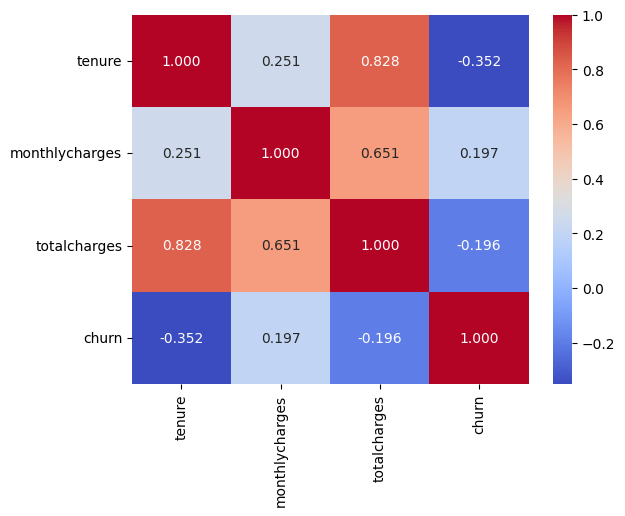

In [ ]:
corr_matrix = df_full_train[num_cols + ['churn']].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.3f')

# One-Hot Encoding

- Use Scikit-Learn to encode categorical features

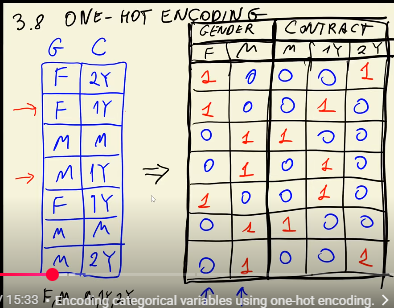

When performing Hot-encoding if a numerical column is added, it will ignore and remain its assigned value

In [119]:
from sklearn.feature_extraction import DictVectorizer

In [125]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [169]:
train_dicts = df_train[cat_cols + num_cols].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
dv

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [157]:
# Corresponds to each element in the transformed data array.
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [168]:
X_train = dv.fit_transform(train_dicts)

(4225, 45)

In [ ]:
val_dicts = df_val[cat_cols + num_cols].to_dict(orient='records')

In [173]:
# do not fit on validation
X_val = dv.transform(val_dicts)